In [7]:
import pymysql
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
conn = pymysql.connect(
    host="127.0.0.1",
    user="root",
    password="password",
    database="olist"
)

In [9]:
pirce_sale_sql = """
    SELECT
    	category_name_translation.product_category_name_english AS category_name,
    	COUNT(products.product_id) AS count_sales,
        AVG(order_items.price) AS avg_price
    FROM
    	order_items
    INNER JOIN
    	products
    ON
    	order_items.product_id = products.product_id
    INNER JOIN
    	category_name_translation
    ON
    	products.product_category_name = category_name_translation.product_category_name
    GROUP BY
    	category_name
    ORDER BY
    	count_sales DESC;
"""

In [14]:
pirce_sale_df = pd.read_sql(pirce_sale_sql, conn)
pirce_sale_df = pirce_sale_df.set_index("category_name")
pirce_sale_df.to_csv("pirce_sales.csv", header=True)

C:\Users\minni\AppData\Local\Temp\ipykernel_26700\1741964492.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pirce_sale_df = pd.read_sql(pirce_sale_sql, conn)


In [11]:
pirce_sale_df

,count_sales,avg_price
category_name,,
bed_bath_table,11115,93.296327
health_beauty,9670,130.163531
sports_leisure,8641,114.344285
furniture_decor,8334,87.564494
computers_accessories,7827,116.513903
...,...,...
arts_and_craftmanship,24,75.583750
la_cuisine,14,146.785000
cds_dvds_musicals,14,52.142857


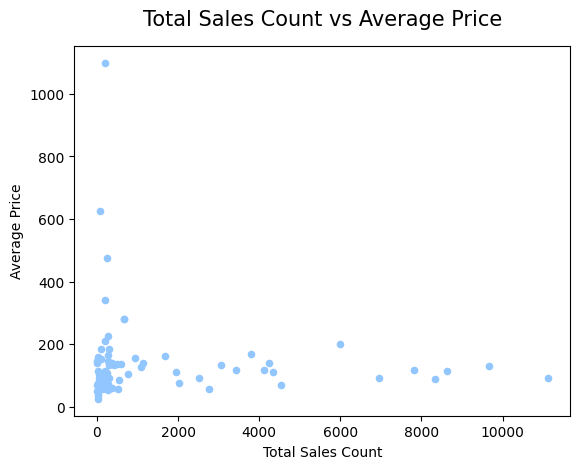

In [12]:
plt.style.use("seaborn-v0_8-pastel")
figure = pirce_sale_df.plot(
    kind="scatter", 
    x="count_sales", 
    y="avg_price"
)
figure.set_title("Total Sales Count vs Average Price", size=15, pad=15)
plt.xlabel("Total Sales Count")
plt.ylabel("Average Price")
plt.savefig("price_sales.png", bbox_inches='tight')